## 뉴스기사 100건 크롤링 (주제:미세먼지)

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/82102/Desktop/chromedriver')

In [4]:
driver.get('https://jtbc.joins.com/search/news?page=1&term=%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80')

In [5]:
def get_url():
    url_list = []
    for i in range(10):
        newsTitleXpath = '//*[@id="content"]/div[3]/div[1]/div[2]/ul/li['+str(i+1)+']/h3/a'
        title = driver.find_element_by_xpath(newsTitleXpath)
        href = title.get_attribute('href')
        url_list.append(href)
    return url_list

In [6]:
urls = get_url()
urls

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11898070',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11761253',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11756948',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11756076',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11724822',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11724130',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11577974',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11905009',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11778849',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11770358']

In [7]:
pageButton = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[2]/div/ul/li[2]/a')
pageButton.click()

In [8]:
urls += get_url()
print('number of news urls :', len(urls))

number of news urls : 20


In [9]:
pageButton = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[2]/div/ul/li[4]/a')
pageButton.click()

In [10]:
urls += get_url()
print('number of news urls :', len(urls))

number of news urls : 30


In [11]:
pageButton = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[2]/div/ul/li[5]/a')
pageButton.click()

In [12]:
urls += get_url()
print('number of news urls :', len(urls))

number of news urls : 40


In [13]:
pageButton = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[2]/div/ul/li[6]/a')
pageButton.click()

In [14]:
urls += get_url()
print('number of news urls :', len(urls))

number of news urls : 50


In [15]:
pageButton = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[2]/div/ul/li[7]/a')
pageButton.click()

In [16]:
urls += get_url()
print('number of news urls :', len(urls))

number of news urls : 60


In [17]:
for i in range(4):
    pageButton = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[2]/div/ul/li[7]/a')
    pageButton.click()
    urls += get_url()
    print('number of news urls :', len(urls))

number of news urls : 70
number of news urls : 80
number of news urls : 90
number of news urls : 100


In [18]:
from selenium.webdriver.support.ui import WebDriverWait

text_list = []
for url in urls:
    driver.get(url)
    wait = WebDriverWait(driver, 2)
    text = driver.find_element_by_xpath('//*[@id="articlebody"]/div[1]')
    text_list.append(text.text)

In [19]:
len(text_list)

100

In [20]:
import pandas as pd
df = pd.DataFrame(text_list, columns=['text'])

In [21]:
df.to_csv('jtbc_미세먼지.csv',index=False)

## 형태소 분석, 워드크라우드

In [62]:
from collections import Counter 
import pandas as pd
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [63]:
new = pd.read_csv('C:/Users/82102/Desktop/jtbc_미세먼지.csv')

In [64]:
kkma = Kkma()

In [65]:
nouns_list=[]
len(new)

100

In [66]:
for item in new['text'][:100]:
    sentence_list = kkma.sentences(item)
    
    for sentence in sentence_list:
        nouns = kkma.pos(sentence)
        for pos in nouns:
            if pos[1] == 'NNG' or pos[1] == 'NNP':
                nouns_list+=[pos[0]]

In [67]:
len(nouns_list)

25190

In [68]:
count = Counter(nouns_list)

In [69]:
count

Counter({'인터뷰': 4,
         '저작권': 2,
         '뉴스': 18,
         '인용': 5,
         '보도': 42,
         '시': 33,
         '출처': 5,
         '방송': 6,
         '아침': 43,
         '진행': 21,
         '이정': 6,
         '앵커': 263,
         '잠': 8,
         '미세먼지': 1423,
         '기승': 29,
         '밤': 35,
         '사이': 38,
         '수도권': 136,
         '충': 17,
         '전라': 3,
         '서쪽': 30,
         '지역': 195,
         '중심': 34,
         '농도': 311,
         '충남': 31,
         '수준': 138,
         '서울': 267,
         '올': 7,
         '가을': 25,
         '처음': 50,
         '오늘': 376,
         '예비': 10,
         '저감': 178,
         '조치': 175,
         '시행': 91,
         '반기': 8,
         '케이웨더': 19,
         '예보': 138,
         '센터': 36,
         '장': 22,
         '자리': 11,
         '반': 29,
         '기성': 17,
         '안녕': 3,
         '장님': 3,
         '이제': 22,
         '시즌': 4,
         '시작': 54,
         '우리나라': 69,
         '경우': 73,
         '전': 59,
         '단계': 23,
         '하순

In [152]:
ignore = ['인터뷰','발','기자','어제','내일','오늘','오전','오후','저작권','뉴스','인용','보도','잠','시','이번','윤','교수','정','출처','방송','진행','이정','앵커',
          '사이','충','올','반기','반','센터','장','자리','장님','경우','전','단계','정도','서','때','앞','김','민','캐스터','얘기','양',
          '일단','터','말','주','사미','동안','질문','그다음','후','반면','의','발','띠','너구리','우리','분','가신','곳','요','들','예','중',
          '동','북아','바라','가사','미','중인','한','유','탓','속','틀','공','철','대꾸','황','석태','관','징','부','위','상','애','상원',
          '재인','분사','새','학','당','오','훈','박원','순','박근','여야','최','반장','제가','구들','하라','이','식','기','만대','옥','차관',
          '제','태경','처','돌','봄','지','용역','환','노','뒷','북','적인','탈','친','나','화','자','점','지적','은','정애','겸','도','안',
          '이재','승','구','소','산하','환국','남','삼','문','사','을','라','급','가기','낙','연','비가','뒤','고','대','일','총','원','만',
          '박','용진','강','카','바','여','다라','쯤']

for word in ignore:
    if word in count:
        del count[word]

* 미세먼지는 사용자 정의 함수에 추가함

In [153]:
count

Counter({'아침': 43,
         '미세먼지': 1423,
         '기승': 29,
         '밤': 35,
         '수도권': 136,
         '전라': 3,
         '서쪽': 30,
         '지역': 195,
         '중심': 34,
         '농도': 311,
         '충남': 31,
         '수준': 138,
         '서울': 267,
         '가을': 25,
         '처음': 50,
         '예비': 10,
         '저감': 178,
         '조치': 175,
         '시행': 91,
         '케이웨더': 19,
         '예보': 138,
         '기성': 17,
         '안녕': 3,
         '이제': 22,
         '시즌': 4,
         '시작': 54,
         '우리나라': 69,
         '하순': 2,
         '작년': 10,
         '올해': 33,
         '예상': 36,
         '지금': 74,
         '상황': 117,
         '현재': 49,
         '밖': 31,
         '보통': 33,
         '예측': 14,
         '중국': 357,
         '유입': 61,
         '스모그': 37,
         '황사': 71,
         '가능성': 28,
         '일부': 39,
         '무시': 1,
         '영향': 101,
         '모레': 13,
         '수요일': 9,
         '목요일': 4,
         '주말': 54,
         '다음': 30,
         '초반': 6,
         '겨울': 26

In [154]:
count.most_common()

[('미세먼지', 1423),
 ('중국', 357),
 ('농도', 311),
 ('서울', 267),
 ('지역', 195),
 ('저감', 178),
 ('조치', 175),
 ('대기', 150),
 ('수준', 138),
 ('예보', 138),
 ('비상', 137),
 ('수도권', 136),
 ('대책', 131),
 ('정부', 126),
 ('상황', 117),
 ('전국', 107),
 ('환경', 104),
 ('영향', 101),
 ('공기', 95),
 ('기준', 93),
 ('먼지', 92),
 ('시행', 91),
 ('국내', 91),
 ('측정', 88),
 ('환경부', 87),
 ('발전소', 86),
 ('차량', 86),
 ('바람', 82),
 ('연구', 76),
 ('지금', 74),
 ('발생', 74),
 ('발령', 73),
 ('황사', 71),
 ('한반도', 71),
 ('우리나라', 69),
 ('결과', 69),
 ('석탄', 69),
 ('지방', 66),
 ('오염', 66),
 ('물질', 66),
 ('문제', 64),
 ('베이징', 64),
 ('마스크', 63),
 ('시간', 63),
 ('배출', 62),
 ('유입', 61),
 ('하늘', 61),
 ('분석', 58),
 ('화력', 58),
 ('새벽', 58),
 ('한국', 57),
 ('관련', 57),
 ('시민', 57),
 ('수치', 57),
 ('정체', 56),
 ('대통령', 56),
 ('확인', 56),
 ('고농도', 55),
 ('시작', 54),
 ('주말', 54),
 ('발표', 54),
 ('날', 53),
 ('공공', 53),
 ('전망', 52),
 ('경기', 51),
 ('처음', 50),
 ('기관', 50),
 ('현재', 49),
 ('부분', 49),
 ('정책', 48),
 ('하루', 47),
 ('대부분', 47),
 ('설치', 46),
 ('지난해', 44),
 ('비',

In [92]:
#Zipf's law
from matplotlib import pyplot
from konlpy.utils import concordance, pprint
from konlpy.corpus import kolaw

count =count

def draw_zipf(count_list, filename, color='blue', marker='o', log=True):
    sorted_list = sorted(count_list, reverse=True)
    #pyplot.plot(sorted_list, color=color, marker=marker)
    pyplot.plot(sorted_list, color=color, marker=marker,linestyle = 'None',markersize=1)
    
    if log==True:
        pyplot.xscale('log')
        pyplot.yscale('log')
        pyplot.xlabel('logged Word Rank')
        pyplot.ylabel('logged Word Count')
    else:
        pyplot.xlabel('Word Rank')
        pyplot.ylabel('Word Count')
    pyplot.savefig(filename)

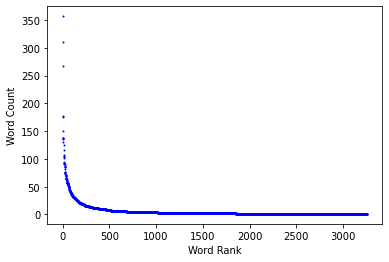

In [93]:
draw_zipf(count.values(), 'C:/Users/82102/Desktop/zipf.png', log=False)

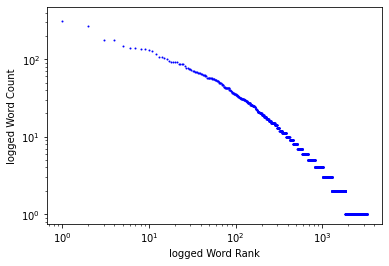

In [94]:
draw_zipf(count.values(), 'C:/Users/82102/Desktop/zipf.png', log=True)

225 225
278 452
304 672
159 743
300 901
270 1012
183 1077
192 1159
118 1193
266 1291
144 1309
172 1351
155 1400
73 1411
89 1424
213 1499
157 1558
178 1598
230 1710
288 1794
143 1832
87 1860
230 1926
55 1936
96 1962
107 1973
99 1979
104 1985
96 1993
115 2014
83 2025
93 2043
93 2064
85 2076
89 2086
87 2111
329 2204
83 2206
83 2214
252 2271
89 2275
112 2285
107 2308
264 2413
58 2418
88 2428
133 2457
84 2481
277 2533
198 2566
241 2616
268 2674
260 2704
126 2722
90 2729
95 2736
124 2760
122 2763
95 2765
123 2774
98 2774
122 2812
96 2816
160 2831
88 2841
171 2853
74 2860
91 2866
129 2884
104 2894
195 2917
109 2926
160 2934
91 2958
130 2980
165 2998
124 3017
118 3019
178 3057
145 3064
343 3146
93 3154
172 3174
80 3179
155 3210
102 3215
95 3229
80 3241
100 3251
106 3257
155 3281
111 3291
103 3299
75 3302
129 3310
128 3321
215 3343
241 3389
189 3410
77 3421


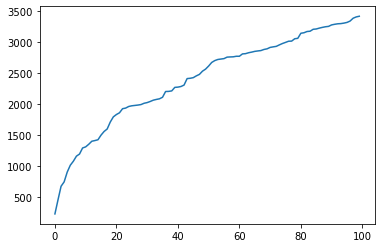

In [95]:
#Heap's law

global_unique = []
global_unique_cnt = []

for item in new['text'][:100]:
    sentence_list = kkma.sentences(item)
    nouns_in_sentence=[]
    
    for sentence in sentence_list:
        nouns = kkma.pos(sentence)
        for pos in nouns:
            if pos[1] == 'NNG' or pos[1] == 'NNP':
                nouns_in_sentence+=[pos[0]]
        
    global_unique += nouns_in_sentence
    global_unique = list(set(global_unique))
    global_unique_cnt.append(len(global_unique))
    print(len(list(set(nouns_in_sentence))), len(global_unique))

                
# draw heap
plt.plot(global_unique_cnt)
plt.savefig('heap.png')

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
font_path = font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'

wordcloud = WordCloud(width = 600,height = 600, font_path = font_path)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(600, 600, 3)


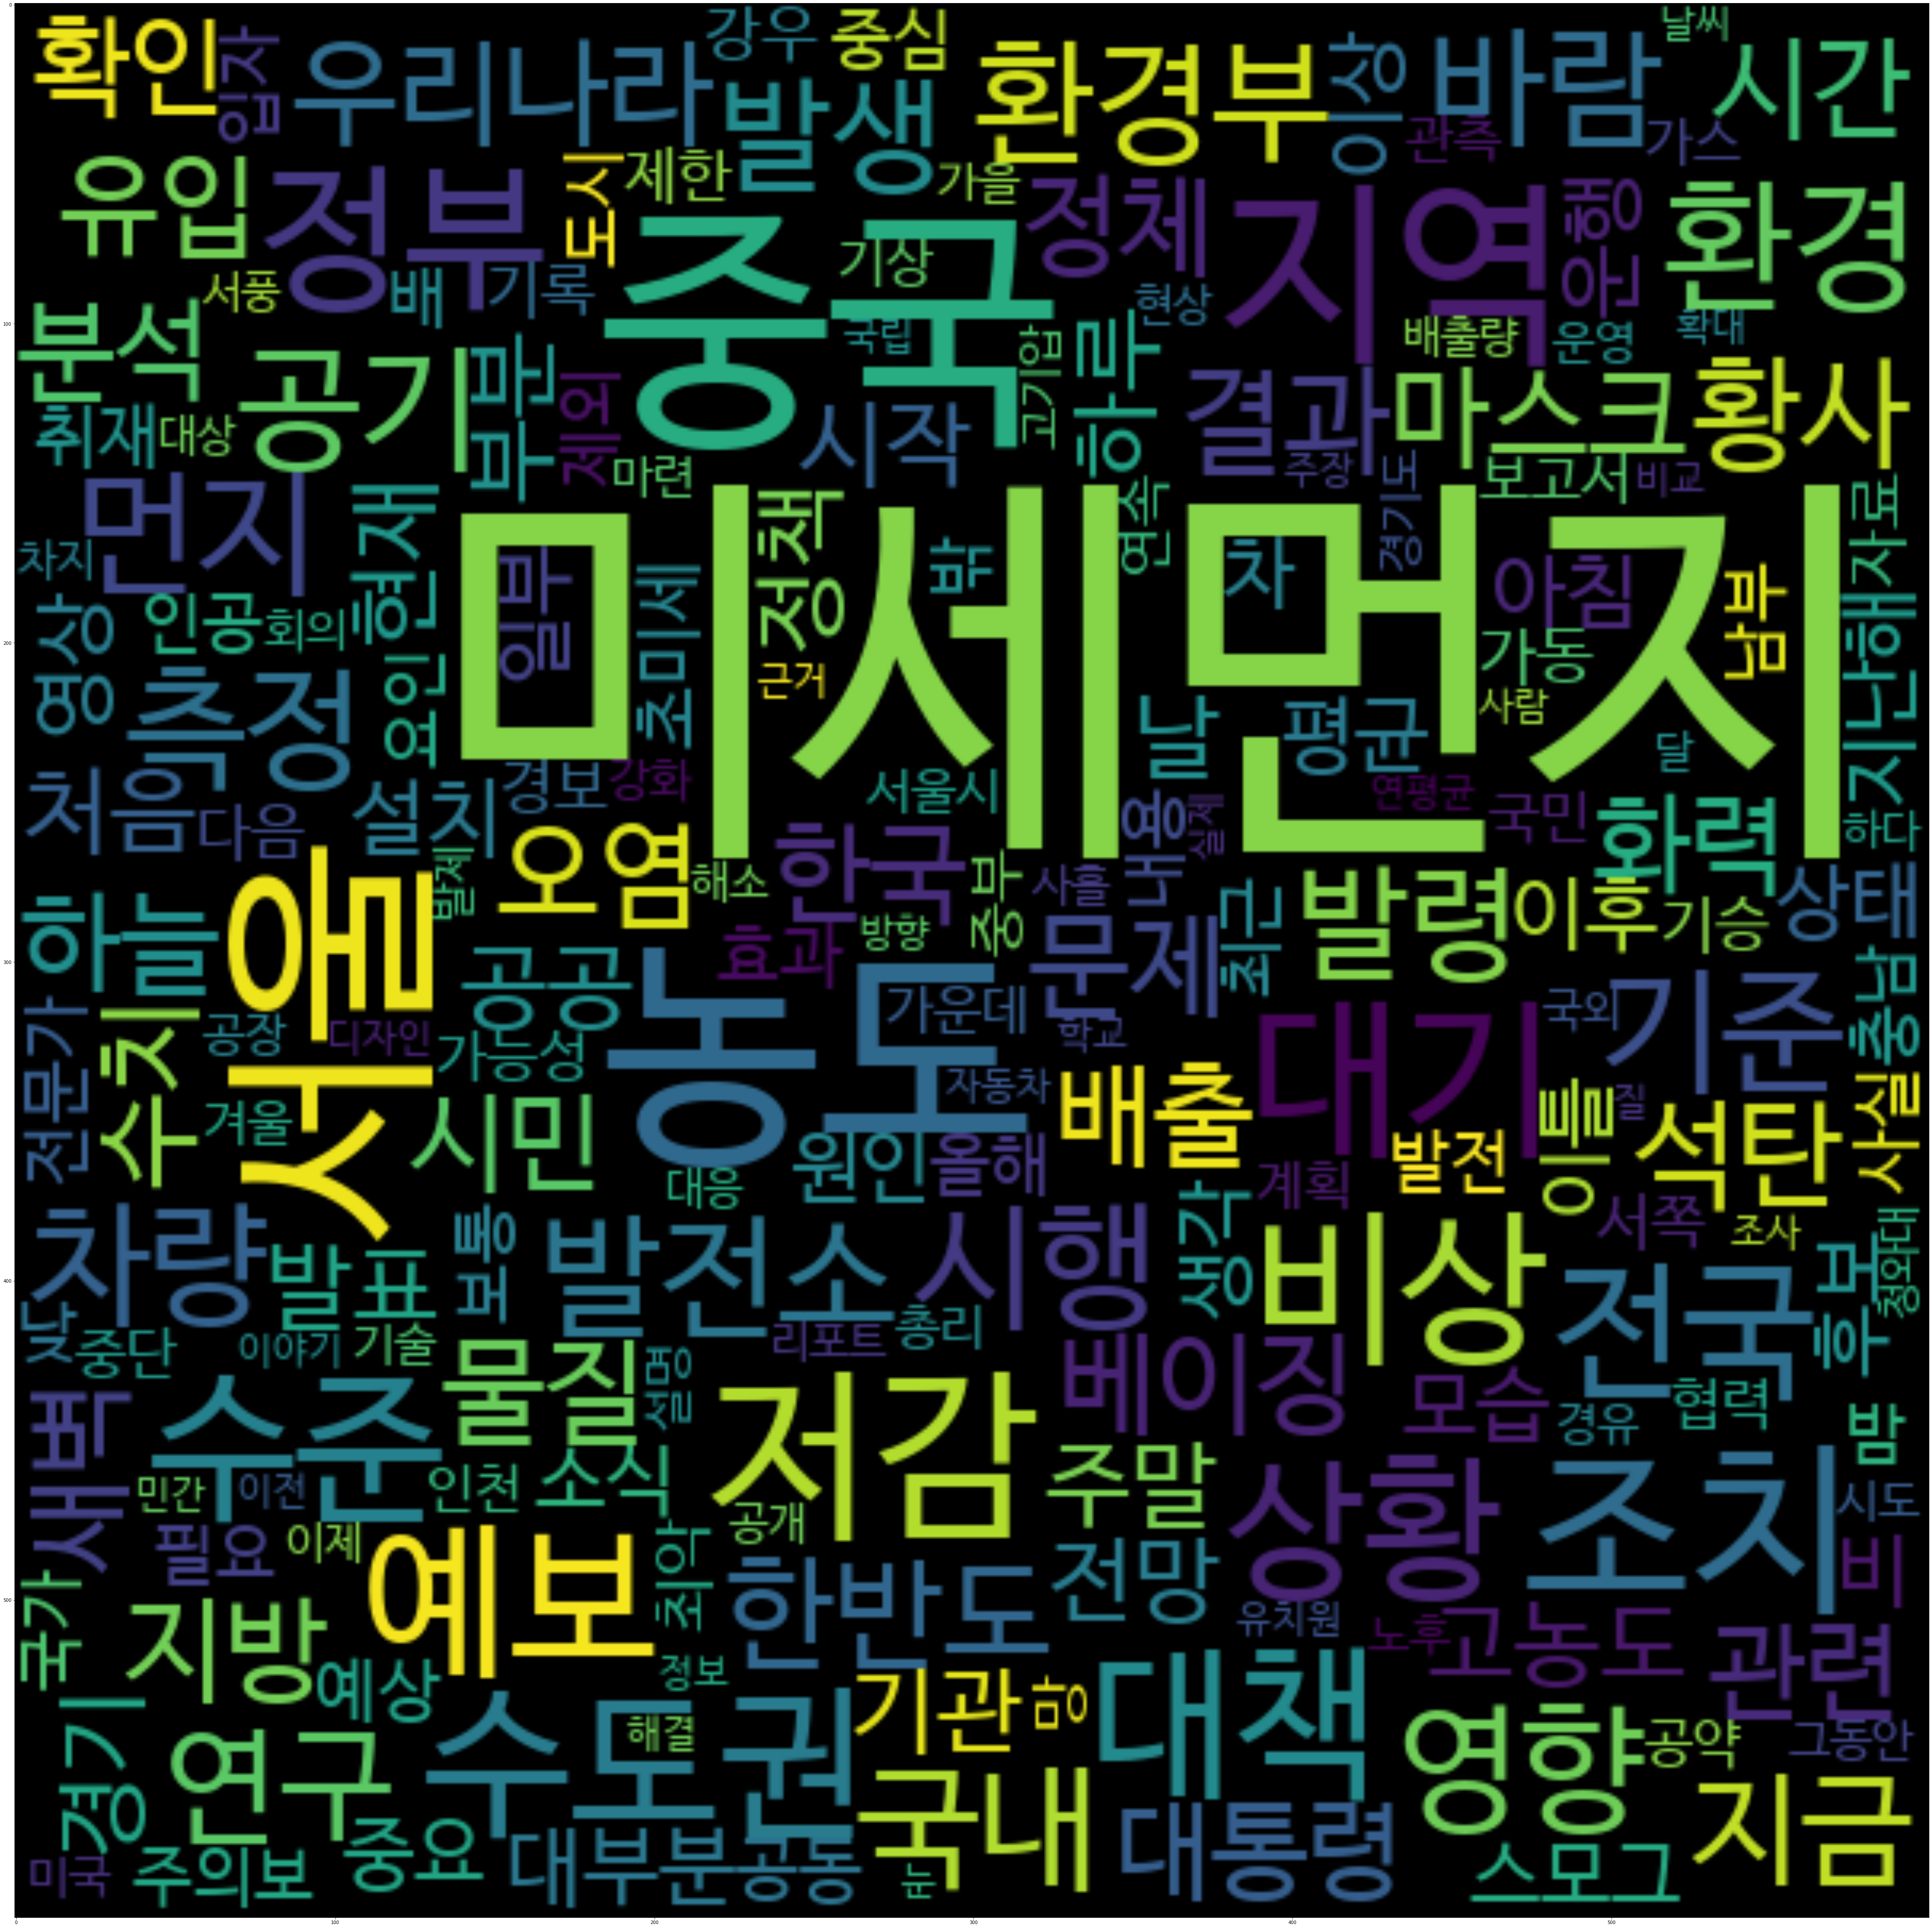

In [156]:
fig = plt.figure(figsize=(80, 80))
plt.imshow(array, interpolation="bilinear")
plt.show()

## Topic modeling

In [73]:
from gensim.corpora import Dictionary

In [132]:
ignore=[]
ignore = ['인터뷰','발','기자','어제','내일','오늘','오전','오후','저작권','뉴스','인용','보도','잠','시','이번','윤','교수','정','출처','방송','진행','이정','앵커',
          '사이','충','올','반기','반','센터','장','자리','장님','경우','전','단계','정도','서','때','앞','김','민','캐스터','얘기','양',
          '일단','터','말','주','사미','동안','질문','그다음','후','반면','의','발','띠','너구리','우리','분','가신','곳','요','들','예','중',
          '동','북아','바라','가사','미','중인','한','유','탓','속','틀','공','철','대꾸','황','석태','관','징','부','위','상','애','상원',
          '재인','분사','새','학','당','오','훈','박원','순','박근','여야','최','반장','제가','구들','하라','이','식','기','만대','옥','차관',
          '제','태경','처','돌','봄','지','용역','환','노','뒷','북','적인','탈','친','나','화','자','점','지적','은','정애','겸','도','안',
          '이재','승','구','소','산하','환국','남','삼','문','사','을','라','급','가기','낙','연','비가','뒤','고','대','일','총','원','만',
          '박','용진','강','카','바','여','다라','쯤']


In [133]:
news_list=[]

chk=0
for item in new['text']:
    sentence_list = kkma.sentences(item)
    
    nouns_list = []    
    for sentence in sentence_list:
        nouns = kkma.pos(sentence)
        for pos in nouns:
            if pos[1] == 'NNG' or pos[1] == 'NNP':
                for word in ignore:
                    if pos== word:
                        chk= 1
                
                if chk== 1:
                    continue
                else:
                    nouns_list+=[pos[0]]
    news_list.append(nouns_list)

In [134]:
for news in news_list:
    for word in ignore:
        while word in news:
            news.remove(word)

In [135]:
news_list

[['아침',
  '미세먼지',
  '기승',
  '밤',
  '수도권',
  '전라',
  '서쪽',
  '지역',
  '중심',
  '미세먼지',
  '농도',
  '충남',
  '지역',
  '미세먼지',
  '농도',
  '수준',
  '서울',
  '수도권',
  '가을',
  '처음',
  '미세먼지',
  '예비',
  '저감',
  '조치',
  '시행',
  '케이웨더',
  '예보',
  '기성',
  '케이웨더',
  '예보',
  '안녕',
  '이제',
  '미세먼지',
  '시즌',
  '시작',
  '기성',
  '케이웨더',
  '예보',
  '우리나라',
  '하순',
  '미세먼지',
  '시작',
  '작년',
  '처음',
  '올해',
  '예상',
  '미세먼지',
  '예비',
  '저감',
  '조치',
  '시행',
  '지금',
  '상황',
  '수준',
  '수도권',
  '미세먼지',
  '예비',
  '저감',
  '조치',
  '시행',
  '기성',
  '케이웨더',
  '예보',
  '현재',
  '충남',
  '지역',
  '미세먼지',
  '농도',
  '수준',
  '밖',
  '서쪽',
  '지역',
  '보통',
  '예측',
  '중국',
  '유입',
  '미세먼지',
  '스모그',
  '유입',
  '예상',
  '황사',
  '가능성',
  '기성',
  '케이웨더',
  '예보',
  '황사',
  '미세먼지',
  '가능성',
  '스모그',
  '황사',
  '일부',
  '황사',
  '무시',
  '가능성',
  '중국',
  '미세먼지',
  '영향',
  '모레',
  '예상',
  '수요일',
  '기성',
  '케이웨더',
  '예보',
  '수요일',
  '목요일',
  '주말',
  '다음',
  '초반',
  '예상',
  '겨울',
  '삼한',
  '나흘',
  '미세먼지',
  '고생',
  '날씨',
  '가을',
  '겨울',
  '기성',
  '케이웨더

In [136]:
dct = Dictionary(news_list)

In [137]:
corpus = [dct.doc2bow(text) for text in news_list]

In [138]:
corpus[1]

[(11, 2),
 (16, 2),
 (17, 1),
 (19, 1),
 (21, 2),
 (25, 1),
 (34, 1),
 (45, 1),
 (46, 29),
 (47, 4),
 (49, 1),
 (51, 2),
 (53, 2),
 (59, 1),
 (60, 1),
 (64, 1),
 (65, 2),
 (76, 1),
 (78, 1),
 (83, 1),
 (85, 2),
 (92, 1),
 (108, 1),
 (120, 1),
 (122, 10),
 (125, 1),
 (130, 1),
 (138, 1),
 (148, 2),
 (154, 2),
 (157, 1),
 (161, 5),
 (164, 4),
 (165, 2),
 (166, 1),
 (167, 2),
 (168, 8),
 (169, 2),
 (170, 1),
 (171, 4),
 (172, 1),
 (173, 1),
 (174, 6),
 (175, 2),
 (176, 1),
 (177, 1),
 (178, 1),
 (179, 1),
 (180, 1),
 (181, 1),
 (182, 1),
 (183, 2),
 (184, 1),
 (185, 2),
 (186, 1),
 (187, 1),
 (188, 3),
 (189, 4),
 (190, 1),
 (191, 1),
 (192, 5),
 (193, 1),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 3),
 (202, 3),
 (203, 1),
 (204, 1),
 (205, 3),
 (206, 1),
 (207, 1),
 (208, 1),
 (209, 3),
 (210, 1),
 (211, 3),
 (212, 1),
 (213, 3),
 (214, 1),
 (215, 1),
 (216, 1),
 (217, 1),
 (218, 2),
 (219, 7),
 (220, 3),
 (221, 1),
 (222, 1),
 (223, 2),
 (224, 2

In [139]:
import gensim 

NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dct, iterations=50)
print(ldamodel.print_topics())

[(0, '0.040*"미세먼지" + 0.013*"중국" + 0.010*"서울" + 0.009*"농도" + 0.008*"저감" + 0.008*"조치" + 0.008*"지역" + 0.007*"측정" + 0.006*"비상" + 0.005*"정부"'), (1, '0.045*"미세먼지" + 0.013*"중국" + 0.012*"조치" + 0.010*"농도" + 0.010*"서울" + 0.009*"지역" + 0.009*"저감" + 0.007*"비상" + 0.005*"대책" + 0.005*"시행"'), (2, '0.068*"미세먼지" + 0.020*"농도" + 0.015*"중국" + 0.012*"서울" + 0.009*"지역" + 0.007*"수도권" + 0.007*"저감" + 0.007*"대기" + 0.006*"전국" + 0.006*"조치"'), (3, '0.063*"미세먼지" + 0.016*"중국" + 0.010*"서울" + 0.009*"예보" + 0.008*"대기" + 0.007*"농도" + 0.007*"정부" + 0.007*"대책" + 0.006*"저감" + 0.006*"수준"')]


In [140]:
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))


Perplexity:  -7.207445072675941


In [141]:
from gensim.models import CoherenceModel

In [142]:
coherence_model_lda= CoherenceModel(model= ldamodel, texts=news_list, dictionary=dct, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44115396442662735


In [143]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary, iterations=50, passes=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(ldamodel.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

In [144]:
import matplotlib.pyplot as plt

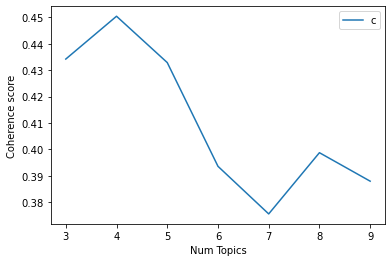

In [145]:
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dct, corpus=corpus, texts=news_list, start=3, limit=10, step=1)
limit=10; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

* perplexity score가 가장 낮으면서 동시에 coherence score는 가장 높은 4개를 토픽 개수로 선택

In [146]:
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dct, iterations=50)
print(ldamodel.print_topics())

[(0, '0.041*"미세먼지" + 0.011*"중국" + 0.010*"서울" + 0.008*"예보" + 0.008*"조치" + 0.008*"저감" + 0.007*"농도" + 0.007*"비상" + 0.007*"지역" + 0.006*"상황"'), (1, '0.047*"미세먼지" + 0.017*"중국" + 0.014*"농도" + 0.009*"서울" + 0.009*"지역" + 0.007*"수준" + 0.007*"조치" + 0.006*"저감" + 0.006*"대기" + 0.005*"먼지"'), (2, '0.065*"미세먼지" + 0.013*"중국" + 0.011*"농도" + 0.010*"서울" + 0.008*"지역" + 0.008*"저감" + 0.008*"예보" + 0.008*"비상" + 0.007*"대책" + 0.007*"정부"'), (3, '0.065*"미세먼지" + 0.017*"중국" + 0.016*"농도" + 0.013*"서울" + 0.008*"대기" + 0.008*"지역" + 0.008*"조치" + 0.008*"수도권" + 0.007*"저감" + 0.007*"수준"')]


In [147]:
model_list

In [148]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [149]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dct, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'C:/Users/82102/Desktop/Topicmodeling.html')

topics = ldamodel.print_topics()
for topic in topics:
    print(topic)
topics=ldamodel[corpus[4]]
topics

(0, '0.041*"미세먼지" + 0.011*"중국" + 0.010*"서울" + 0.008*"예보" + 0.008*"조치" + 0.008*"저감" + 0.007*"농도" + 0.007*"비상" + 0.007*"지역" + 0.006*"상황"')
(1, '0.047*"미세먼지" + 0.017*"중국" + 0.014*"농도" + 0.009*"서울" + 0.009*"지역" + 0.007*"수준" + 0.007*"조치" + 0.006*"저감" + 0.006*"대기" + 0.005*"먼지"')
(2, '0.065*"미세먼지" + 0.013*"중국" + 0.011*"농도" + 0.010*"서울" + 0.008*"지역" + 0.008*"저감" + 0.008*"예보" + 0.008*"비상" + 0.007*"대책" + 0.007*"정부"')
(3, '0.065*"미세먼지" + 0.017*"중국" + 0.016*"농도" + 0.013*"서울" + 0.008*"대기" + 0.008*"지역" + 0.008*"조치" + 0.008*"수도권" + 0.007*"저감" + 0.007*"수준"')


[(0, 0.023036152), (2, 0.16093306), (3, 0.81542605)]

## 토픽1: 미세먼지 예보
## 토픽2: 미세먼지 지역별 농도수준
## 토픽3: 미세먼지 정부의 저감대책
## 토픽4: 수도권 대기 상황(+미세먼지 원인)